In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
import random
from time import sleep
import pprint
import joblib
from functools import partial

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

#plotly visualisation
import plotly 
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import plotly.figure_factory as ff 
from plotly.offline import iplot
from plotly import tools


#Machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, PolynomialFeatures,OneHotEncoder,FunctionTransformer
#To Pipeline the process 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, KFold, cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta
#tuning hyperparameters
from bayes_opt import BayesianOptimization

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe,hp
from hyperopt.pyll import scope

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [2]:
# Load dataset
df_train = pd.read_csv("/kaggle/input/30-days-of-ml/train.csv", index_col=0)
df_test =  pd.read_csv("/kaggle/input/30-days-of-ml/test.csv",index_col=0)
df_sub =  pd.read_csv("/kaggle/input/30-days-of-ml/sample_submission.csv",index_col=0)

print(f"train set has : {df_train.shape} shape")
print(f"test set has : {df_test.shape} shape")
print(f"sample submission set has : {df_sub.shape} shape")

train set has : (300000, 25) shape
test set has : (200000, 24) shape
sample submission set has : (200000, 1) shape


In [3]:
# Add display data to see all your columns
# Configuration to see all features
pd.set_option('display.max_row', 27)
pd.set_option('display.max_column', 27)

In [4]:
# Take a look on the train dataset
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [5]:
# Take a look on the test dataset
df_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [6]:
# Take a look on sub dataframe for the submission
df_sub.head()

,target
id,
0,0.5
5,0.5
15,0.5
16,0.5
17,0.5


In [7]:
# Merge data
df_test_full = pd.merge(df_test,df_sub,on = "id")
print(f"df_test_full shape : {df_test_full.shape}")
df_test_full.head()

df_test_full shape : (200000, 25)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702,0.5
5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940,0.5
15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099,0.5
16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372,0.5
17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412,0.5


# I - EDA (Exploration Data Analysis)

In [8]:
df = df_train.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

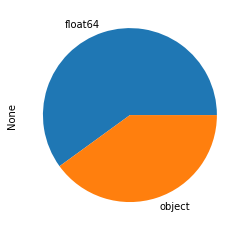

In [9]:
df.dtypes.value_counts().plot.pie()
df.info()

In [10]:
#finding the unique values in each column
for col in df.columns:
    print('We have {} unique values in {} column'.format(len(df[col].unique()),col))
    print('__'*30)



We have 2 unique values in cat0 column
____________________________________________________________
We have 2 unique values in cat1 column
____________________________________________________________
We have 2 unique values in cat2 column
____________________________________________________________
We have 4 unique values in cat3 column
____________________________________________________________
We have 4 unique values in cat4 column
____________________________________________________________
We have 4 unique values in cat5 column
____________________________________________________________
We have 8 unique values in cat6 column
____________________________________________________________
We have 8 unique values in cat7 column
____________________________________________________________
We have 7 unique values in cat8 column
____________________________________________________________
We have 15 unique values in cat9 column
____________________________________________________________

In [11]:
df.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

In [12]:
#describe our data
df[df.select_dtypes(exclude='object').columns].describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [13]:
# Observe missiing value
#find the null values in each column
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null values'})

,Null values
cat0,0.0
cont3,0.0
cont13,0.0
cont12,0.0
cont11,0.0
cont10,0.0
cont9,0.0
cont8,0.0
cont7,0.0
cont6,0.0


In [14]:
#lets see the correlation between columns and target column
corr = df.corr()
corr['target'].sort_values(ascending=False)[1:].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))



,target
cont12,0.055829
cont10,0.052468
cont7,0.035143
cont2,0.034280
cont11,0.033378
cont0,0.028819
cont8,0.017740
cont1,-0.002096
cont6,-0.013807
cont5,-0.015058


In [15]:
#lets create a dataframe for the numeric columns with high skewness

skewness = pd.DataFrame()

num_cols = []
for col in df.select_dtypes(exclude='object'):
    num_cols.append(col)

skewness[['Positive Columns','Skewness(+v)']] = df[num_cols].skew().sort_values(ascending=False)[:10].reset_index()
skewness[['Negative Columns','Skewness(-v)']] = df[num_cols].skew().sort_values(ascending=True)[:10].reset_index()

skewness.columns = pd.MultiIndex.from_tuples([('Positive Skewness', 'Columns'), ('Positive Skewness', 'Skewness'),
                                              ('Negative Skewness', 'Columns'), ('Negative Skewness', 'Skewness')])
skewness

Positive Skewness           Negative Skewness          
            Columns  Skewness           Columns  Skewness
0             cont4  0.776598             cont1  0.032677
1             cont8  0.540071            cont10  0.056184
2             cont6  0.507824             cont2  0.082866
3             cont7  0.428809            cont12  0.101119
4             cont3  0.402795            target  0.176487
5             cont9  0.388129             cont0  0.236360
6            cont11  0.318717            cont13  0.243352
7             cont5  0.275822             cont5  0.275822
8            cont13  0.243352            cont11  0.318717
9             cont0  0.236360             cont9  0.388129

Text(0.5, 1.0, 'Log Target Distribution')

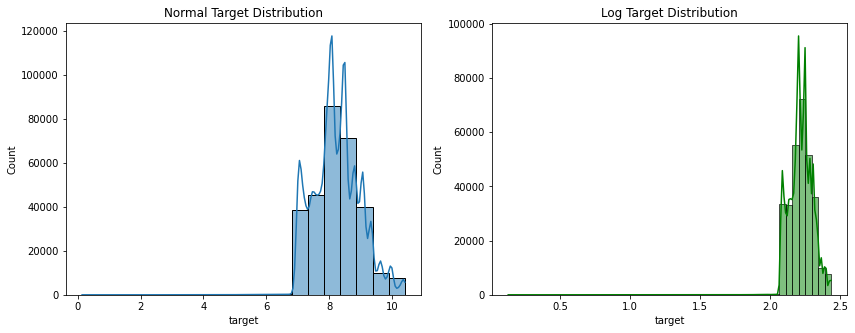

In [16]:
# take a look on your target with Log distribution
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(14,5))
sns.histplot(ax=axes[0],data=df, x="target", kde=True, bins=20)
axes[0].set_title('Normal Target Distribution')
sns.histplot(ax=axes[1],data=df, x=np.log1p(df.target),color='g', kde=True, bins=50)
axes[1].set_title('Log Target Distribution')

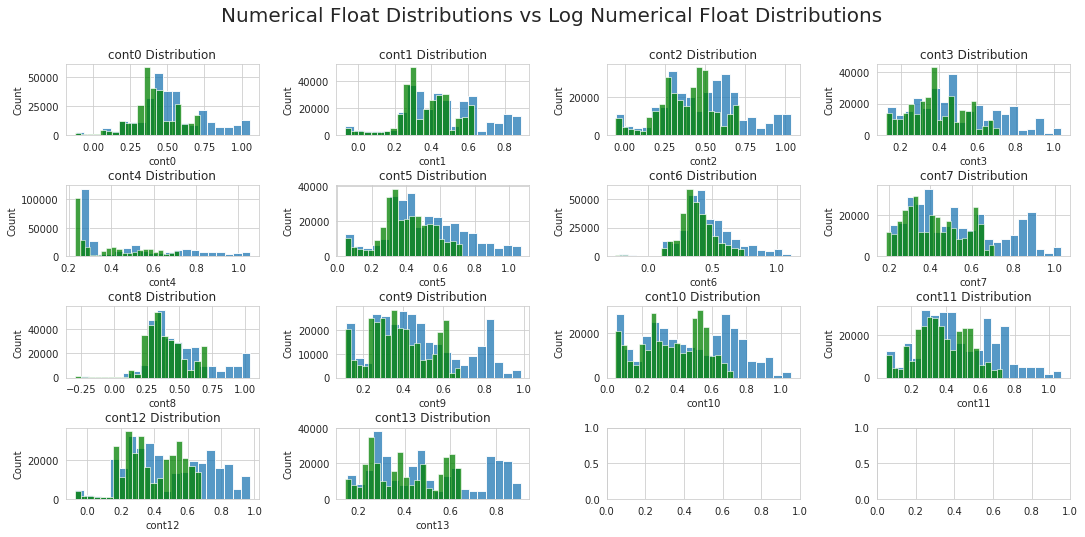

In [17]:
# Take a look on the numerical distributions : float type with Log distribution
sns.set_style('whitegrid')

#  plot Numerical Data
# Calculating required amount of rows to display all feature plots
columns = df.drop(["target"],axis=1).select_dtypes(exclude="object").columns.values
cols = 4
rows = len(columns) // cols + 1

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(18,8))

#fig, axes = plt.subplots(4,4, figsize=(18, 8));
plt.subplots_adjust(hspace = 0.7, wspace=0.4)
fig.suptitle('Numerical Float Distributions vs Log Numerical Float Distributions', fontsize=20)

# Take a look on the numerical distributions
a = len(df.select_dtypes('float').columns)  # number of rows

for i,col in zip(range(a),df.drop('target',axis = 1).select_dtypes('float')):
    sns.histplot(df[col], ax=axes[i//cols][i%rows],bins=20);
    axes[i//cols][i%rows].set_title(col+' Distribution')

for i,col in zip(range(a),df.drop('target',axis = 1).select_dtypes('float')):
    sns.histplot(np.log1p(df[col]), ax=axes[i//cols][i%rows], bins=20, color='g');
    axes[i//cols][i%rows].set_title(col+' Distribution')



In [18]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_features  = [col for col in df.columns if
                    df[col].nunique() <= 15 and 
                    df[col].dtype == "object"]

# Select numerical columns
numeric_features  = [col for col in df.columns if 
                df[col].dtype in ['int64', 'float64']
                 ]

# Keep selected columns only
my_features = categorical_features + numeric_features

#
print('categorical_features:', categorical_features)
print('numeric_features:', numeric_features)
print('my_features:', my_features)


#remove target column from Numeric features
numeric_features.remove('target')
print('numeric_features minus target column:', numeric_features)

categorical_features: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
numeric_features: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target']
my_features: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target']
numeric_features minus target column: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


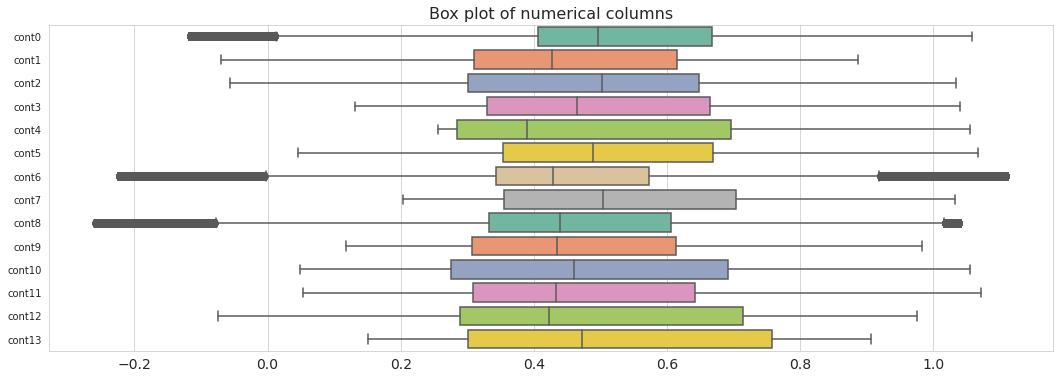

In [19]:
## Box Plot for Outliers
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns', fontsize=16);

"cont0" / "cont6" and "cont8" has some outliers

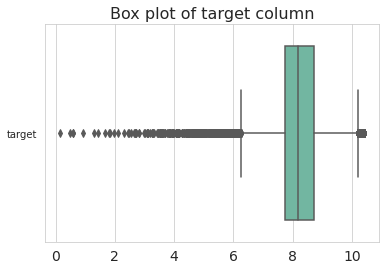

In [20]:
sns.boxplot(data=df[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column', fontsize=16);

In [21]:
# Deal with Outliers

from scipy import stats


def treatoutliers(df=None, columns=None, factor=1.5, method='IQR', treatment='cap'):

    for column in columns:
        if method == 'STD':
            permissable_std = factor * df[column].std()
            col_mean = df[column].mean()
            floor, ceil = col_mean - permissable_std, col_mean + permissable_std
        elif method == 'IQR':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            floor, ceil = Q1 - factor * IQR, Q3 + factor * IQR
#         print(floor, ceil)
        if treatment == 'remove':
            print(treatment, column)
            df = df[(df[column] >= floor) & (df[column] <= ceil)]
        elif treatment == 'cap':
            print(treatment, column)
            df[column] = df[column].clip(floor, ceil)

    return df
    
#remove outliere from target column 
#for colName in [['target']]:
    #X_full = treatoutliers(df=X_full,columns=colName, treatment='remove')         
    
#Quantile-based Flooring and Capping
for colName in [['target','cont0','cont6','cont8']]:
    df = treatoutliers(df=df,columns=colName, treatment='cap')      
    
df.info()



cap target
cap cont0
cap cont6
cap cont8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10 

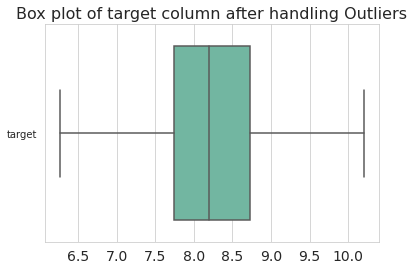

In [22]:
sns.boxplot(data=df[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column after handling Outliers', fontsize=16);


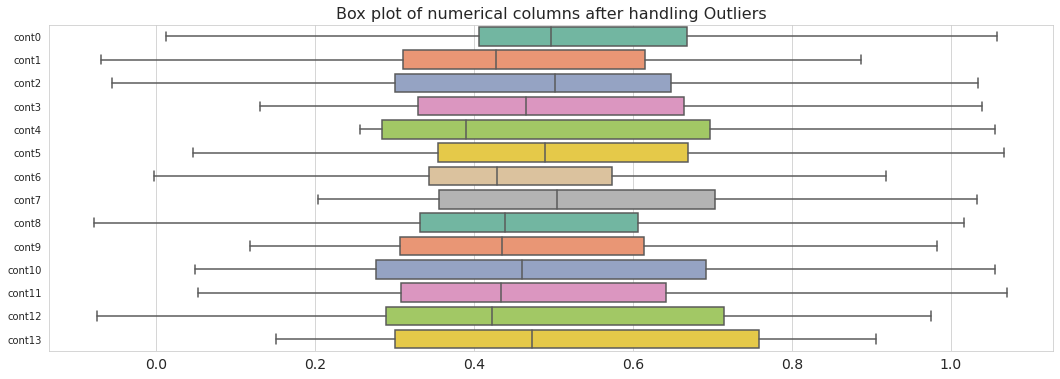

In [23]:
## Box Plot for Outliers
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns after handling Outliers', fontsize=16);

In [24]:
# take a look on object variables
for col in df.select_dtypes("object").columns:
    print(f"{col} ----------------{df[col].unique()}")

cat0 ----------------['B' 'A']
cat1 ----------------['B' 'A']
cat2 ----------------['B' 'A']
cat3 ----------------['C' 'A' 'D' 'B']
cat4 ----------------['B' 'C' 'A' 'D']
cat5 ----------------['B' 'D' 'C' 'A']
cat6 ----------------['A' 'B' 'C' 'H' 'D' 'I' 'G' 'E']
cat7 ----------------['E' 'F' 'D' 'B' 'G' 'C' 'A' 'I']
cat8 ----------------['C' 'A' 'G' 'E' 'F' 'D' 'B']
cat9 ----------------['N' 'O' 'F' 'K' 'M' 'I' 'G' 'H' 'L' 'B' 'A' 'J' 'D' 'C' 'E']


<AxesSubplot:xlabel='target_bins', ylabel='target'>

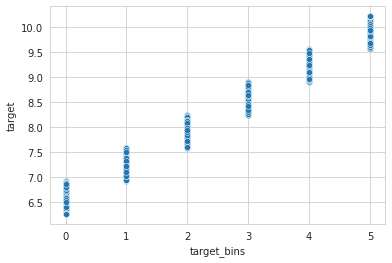

In [25]:
# new feature :
df['target_bins'] = pd.cut(df['target'],bins=6, labels=False)
df['target_bins'].value_counts()
sns.scatterplot(x='target_bins',y='target',data=df)


In [26]:
dico_bins_target = {
    0 : '0-2',
    1 : '2-4',
    2 : "4-6",
    3 : "6-8",
    4 : "7-8",
    5 : "9-10"
}

df['target_bins'] = df['target_bins'].map(dico_bins_target)

In [27]:
# Creat a new function to better visualization of our categorical features

def visualisation_data(dataset):
    
    #Visualization on your Data

    #  plot Numerical Data

    a = len(dataset.select_dtypes(include='object').columns)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter


    fig = plt.figure(figsize=(22,28))
    # Adding some distance between plots
    plt.subplots_adjust(hspace = 0.3)
    
    for i in dataset.select_dtypes(include='object'):
        if i != 'target_bins':
            plt.subplot(a, b, c)
            sns.heatmap(pd.crosstab(df['target_bins'], dataset[i]), annot=True, fmt='d')
            plt.xlabel(i)
            c = c + 1
            
            plt.subplot(a, b, c)
            sns.countplot(x=i, palette="ch:.25", data=dataset)
            plt.xlabel(i)
            c = c + 1
            
    plt.show()

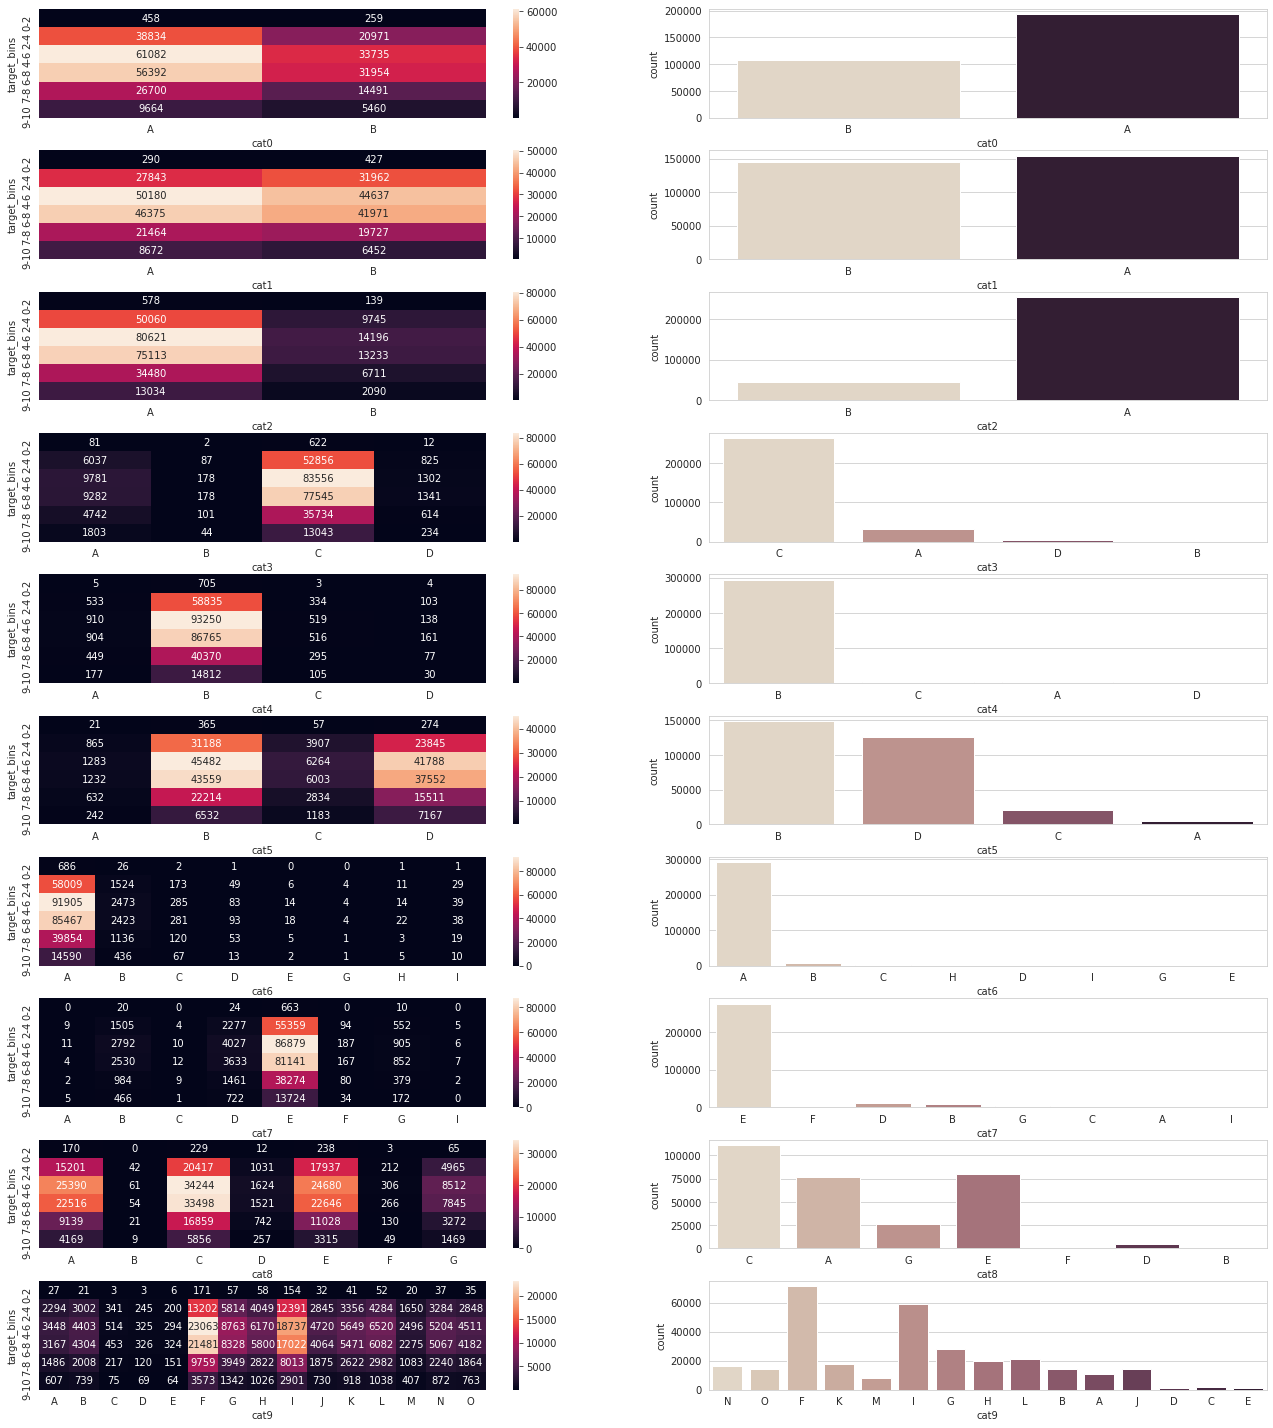

CPU times: user 10 s, sys: 299 ms, total: 10.3 s
Wall time: 10.2 s


In [28]:
%%time
visualisation_data(df)

In [29]:
# Colors to be used for plots
colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
          "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
          "lightskyblue", "sandybrown", "yellowgreen", "indianred",
          "lightsteelblue", "mediumorchid", "deepskyblue"]



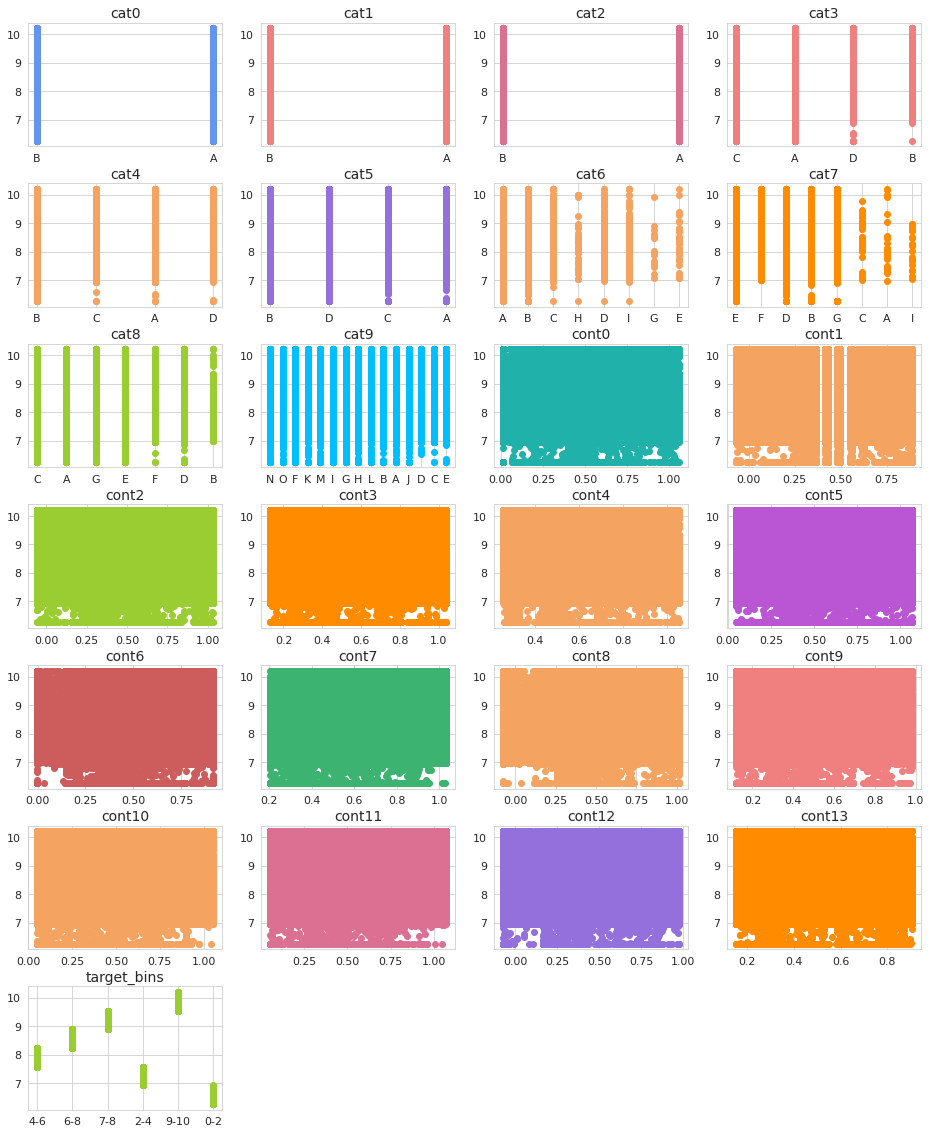

In [30]:
columns = df.drop(["target"], axis=1).columns.values

# Calculating required amount of rows to display all feature plots
cols = 4
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16,20), sharex=False)

# Adding some distance between plots
plt.subplots_adjust(hspace = 0.3)

i=0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            scatter = axs[r, c].scatter(df[columns[i]].values,
                                        df["target"],
                                        color=random.choice(colors))
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=11)
            axs[r, c].tick_params(axis="x", labelsize=11)
                                  
        i+=1
plt.show()

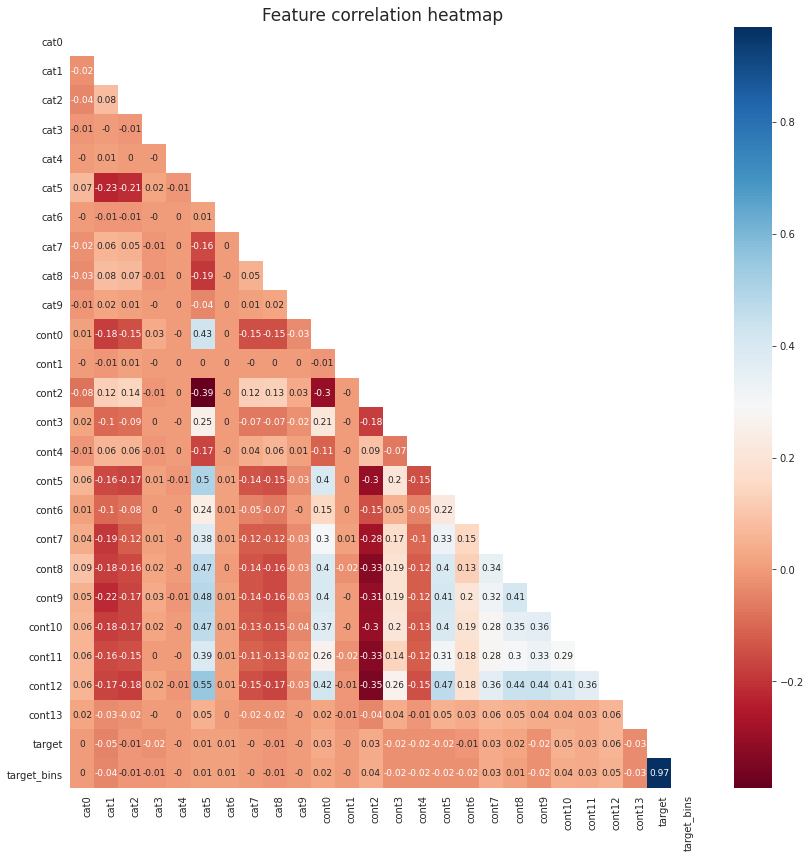

In [31]:
# Encoding categorical features with OrdinalEncoder

for col in df.select_dtypes('object'):
    encoder = OrdinalEncoder()
    df[col] = encoder.fit_transform(np.array(df[col]).reshape(-1, 1))

# Calculatin correlation values
df = df.corr().round(2)

# Mask to hide upper-right part of plot as it is a duplicate
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True

# Making a plot
plt.figure(figsize=(14,14))
ax = sns.heatmap(df, annot=True, mask=mask, cmap="RdBu", annot_kws={"weight": "normal", "fontsize":9})
ax.set_title("Feature correlation heatmap", fontsize=17)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor", weight="normal")
plt.setp(ax.get_yticklabels(), weight="normal",
         rotation_mode="anchor", rotation=0, ha="right")
plt.show();



# II - PREPROCESSING DATA

In [32]:
def feature_engineering(df):
    
    #df['cont50'] = df['cont5'] + df['cont0']
    #df['cont70'] = df['cont7'] + df['cont0']
    df = df.drop(['cat4'], axis=1)

    return df

In [33]:
# Remove rows with missing target, separate target from predictors
y = df_train['target']
df_train.drop(['target'], axis=1, inplace=True)



df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

# Preview features
df_train.head()

,cat0,cat1,cat2,cat3,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [34]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(df_train, y, 
                                                                train_size=0.9, test_size=0.1,
                                                                random_state=0)

In [35]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_features  = [cname for cname in X_train.columns if
                    X_train[cname].nunique() <= 15 and 
                    X_train[cname].dtype == "object"]

# Select numerical columns
numeric_features  = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']
                 ]

# Keep selected columns only
my_features = categorical_features + numeric_features

#
print('categorical_features', categorical_features)
print('numeric_features', numeric_features)
print('my_features', my_features)

categorical_features ['cat0', 'cat1', 'cat2', 'cat3', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
numeric_features ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
my_features ['cat0', 'cat1', 'cat2', 'cat3', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


In [36]:
X_train = X_train[my_features]
X_valid = X_valid[my_features]
X_test = df_test[my_features]

df_X_train = X_train.copy()
df_X_valid = X_valid.copy()
df_X_test = X_test.copy()

print(f'X_train shape : {X_train.shape}')
print(f'X_valid shape : {X_valid.shape}')
print(f'X_test shape : {X_test.shape}')

X_train shape : (270000, 23)
X_valid shape : (30000, 23)
X_test shape : (200000, 23)


In [37]:
#random seed
rans = 0

def log_transform(x):
    return np.log(x + 1)


transformer = FunctionTransformer(log_transform)


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
       ,('transformer', transformer)
      ,('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')) 
    # ,('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
    ,('ordinal', OrdinalEncoder())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numeric_features),
    ],
    remainder="passthrough"
  )

# III - MODELING

In [38]:
%%time
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_valid = pd.DataFrame(preprocessor.fit_transform(X_valid))
X_test = pd.DataFrame(preprocessor.fit_transform(X_test))


CPU times: user 24.5 s, sys: 97.6 ms, total: 24.6 s
Wall time: 24.6 s


In [39]:
# Fit transform removed index; put it back
X_train = pd.DataFrame(data=X_train.values, columns=df_X_train.columns)
X_valid = pd.DataFrame(data=X_valid.values, columns=df_X_valid.columns)
X_test = pd.DataFrame(data=X_test.values, columns=df_X_test.columns)

In [40]:
X_train.head()

,cat0,cat1,cat2,cat3,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.0,1.0,0.0,2.0,2.0,1.0,4.0,4.0,5.0,1.553735,-0.946839,-1.186723,0.517364,1.615587,0.006773,0.735917,0.830184,0.284103,-0.678293,-0.686462,0.883132,-0.205393,-1.122946
1,1.0,0.0,1.0,2.0,0.0,0.0,4.0,2.0,5.0,0.696512,-0.678623,-0.106771,-1.241567,1.640114,0.754357,-0.290488,0.438435,-0.267728,0.621106,1.011699,0.559063,-0.870548,-1.142467
2,0.0,1.0,1.0,2.0,1.0,0.0,4.0,4.0,10.0,-0.052265,-0.666171,1.033823,-1.076107,-0.066303,-1.185406,-1.455751,-0.097925,-0.940826,-0.334100,-0.345919,0.728868,0.700402,-0.127621
3,0.0,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,-0.461387,1.310424,0.668462,-0.290442,0.175680,0.409640,-0.461964,-0.700656,0.884873,-0.386048,-0.678819,-0.357004,0.220905,-1.071706
4,0.0,1.0,0.0,2.0,1.0,0.0,4.0,2.0,8.0,-1.098598,-0.418549,1.553433,0.348893,-0.928092,-2.338578,0.265147,-1.102460,-0.999152,-0.857941,-0.018779,-0.781826,-0.714172,1.335827


Feature 0 - cat0 : 7.201213
Feature 1 - cat1 : 654.884722
Feature 2 - cat2 : 23.592744
Feature 3 - cat3 : 58.667849
Feature 4 - cat5 : 43.246550
Feature 5 - cat6 : 9.835253
Feature 6 - cat7 : 2.150639
Feature 7 - cat8 : 35.933349
Feature 8 - cat9 : 0.115353
Feature 9 - cont0 : 230.678284
Feature 10 - cont1 : 0.070914
Feature 11 - cont2 : 337.743106
Feature 12 - cont3 : 152.008494
Feature 13 - cont4 : 136.135089
Feature 14 - cont5 : 65.666768
Feature 15 - cont6 : 53.200221
Feature 16 - cont7 : 339.411815
Feature 17 - cont8 : 86.972380
Feature 18 - cont9 : 65.925995
Feature 19 - cont10 : 776.860416
Feature 20 - cont11 : 297.293910
Feature 21 - cont12 : 889.224167
Feature 22 - cont13 : 216.425421


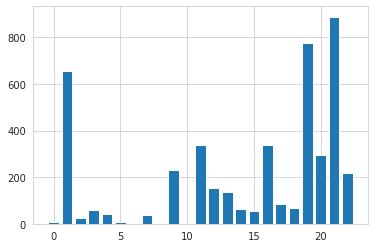

In [41]:
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d - %s : %f' % (i,pd.DataFrame(X_train).columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [42]:
#Best Features 
k = 0
for i in range(len(fs.scores_)):
    if fs.scores_[i] > 100:
        print('Feature %d - %s : %f' % (i,pd.DataFrame(X_train).columns[i], fs.scores_[i]))
        k += 1
        
print(f'best k value : {k}')

Feature 1 - cat1 : 654.884722
Feature 9 - cont0 : 230.678284
Feature 11 - cont2 : 337.743106
Feature 12 - cont3 : 152.008494
Feature 13 - cont4 : 136.135089
Feature 16 - cont7 : 339.411815
Feature 19 - cont10 : 776.860416
Feature 20 - cont11 : 297.293910
Feature 21 - cont12 : 889.224167
Feature 22 - cont13 : 216.425421
best k value : 10


In [43]:
#Init preprocessor
# preprocessor = make_pipeline(preprocessor,SelectKBest(f_regression,k=k))

In [44]:
#Init preprocessor
#preprocessor = make_pipeline(SelectKBest(f_regression,k=k))

In [45]:
# Evalution Model 
def evaluation(model, name_model):
    
    model.fit(X_train,y_train)
    #model_score = model.score(X_train,y_train)
    ypred = model.predict(X_test)
    ypred = model.predict(X_valid)
    
    N, train_score, val_score,fit_times,score_times = learning_curve(model, X_train, y_train,shuffle = True,
                                              cv=5,scoring='neg_root_mean_squared_error',
                                              train_sizes=np.linspace(0.1, 1, 10),random_state=0)
    
    
    #print('Training scores:\n\n', train_score)
    #print('\n', '-' * 70) # separator to make the output easy to read
    #print('\nValidation scores:\n\n', val_score)
    
    train_scores_mean = -train_score.mean(axis = 1)
    validation_scores_mean = -val_score.mean(axis = 1)
    #fit_times_mean = fit_times.mean ()
    #score_times_mean = score_times.mean()
    
    print(f'Model :{name_model}')
    #print('\n', '-' * 20) # separator
    #print('Mean training scores\n\n', pd.Series(train_scores_mean, index = N))
    #print('\n', '-' * 20) # separator
    #print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = N))
    #print('\n', '-' * 20) # separator
    
    #print(f'Score R2 : {model_score}')
    print('Mean training scores : ', train_scores_mean.mean())
    print('Mean Validation scores : ', validation_scores_mean.mean())
    #print(f'Mean fit time : {fit_times_mean}s / Mean score time : {score_times_mean}')

    #print('MSE:', mean_squared_error(y_test, ypred))
    print(f'RMSE: ', mean_squared_error(y_valid, ypred, squared="False"))
    
    print('\n', '-' * 20) # separator
    print('\n','-' * 20) # separator
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.xlabel('Number of train size')
    plt.ylabel('neg_root_mean_squared_error')
    plt.title(name_model)
    plt.legend()

In [46]:
# Elastic = make_pipeline(preprocessor, ElasticNet(alpha=0.0005, l1_ratio=0.9,random_state=0))
# Lasso_model = make_pipeline(preprocessor,Lasso(alpha =0.0005,random_state=0))
# Ridge_model = make_pipeline(preprocessor, Ridge(random_state=0))
# RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
# Adaboost = make_pipeline(preprocessor, AdaBoostRegressor(random_state=0))
# XGboost = make_pipeline(preprocessor, XGBRegressor())
# GradientBoosting = make_pipeline(preprocessor, GradientBoostingRegressor(random_state=0))
# LGBM = make_pipeline(preprocessor, LGBMRegressor(random_state=0))

In [47]:
# define a dict of model
# dict_of_models = {
#                 'Elastic': Elastic,
#                 'Lasso_model': Lasso_model,
#                 'Ridge_model': Ridge_model,
#                 'XGboost' : XGboost,
#               'GradientBoosting': GradientBoosting,
#                 'LGBM': LGBM
#}



In [48]:
# %%time

# print("Evaluation :")

# for name, model in dict_of_models.items():
#    evaluation(model, name)



# III - MODELING

### Take on look on different model behaviour : LGBM / XGBOOST / Gradient Boosting

# HYPERPARAMETERS LGBM

In [49]:
%%time

def bayes_parameter_opt_lgb(X, y, init_round=20, opt_round=25, n_folds=5, random_seed=6,n_estimators=1000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,lambda_l1,lambda_l2,min_split_gain):
        params = {'boosting':'gbdt','application':'regression', 'metric':'rmse','force_col_wise': 'true'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_bin))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        #params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        #params['subsample'] = max(min(subsample, 1), 0)
        params['verbose'] = -1
        params['lambda_l1'] = max(min(lambda_l1,1), 0)
        params['lambda_l2'] = max(min(lambda_l2,1), 0)
        params['min_split_gain'] = int(round(min_split_gain))
        #params['bagging_freq'] = int(round(bagging_freq))
        #params['min_child_weight'] = int(round(min_child_weight))
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=False, verbose_eval =200, metrics=['rmse'])
        return -np.min(cv_result['rmse-mean'])
        
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.001, 0.5),
                                            'num_leaves': (31, 80),
                                            'feature_fraction': (0.1, 1.0),
                                            'bagging_fraction': (0.01, 1.0),
                                            'max_depth': (25, 40),
                                            'max_bin':(300,600),
                                            'min_data_in_leaf': (20, 40),
                                            #'min_sum_hessian_in_leaf':(0,100),
                                            'lambda_l1': (0.1, 5),
                                            'lambda_l2': (0.1, 3),
                                            'min_split_gain': (0.001, 0.01),
                                            #'min_child_weight': (5, 50),
                                            #'subsample': (0.01, 1.0),
                                            #'bagging_freq' : (3, 6)
                                            },random_state=0)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_rmse =[]
    for model in range(len( lgbBO.res)):
        model_rmse.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_rmse).idxmax()]['target'],lgbBO.res[pd.Series(model_rmse).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=20, opt_round =25, n_folds=5, random_seed=6,n_estimators=1000)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -0.723    |  0.5533   |  0.7437   |  3.054    |  1.68     |  0.2124   |  493.8    |  31.56    |  37.84    |  0.009673 |  49.79    |
|  2        | -0.7285   |  0.7938   |  0.576    |  2.883    |  2.784    |  0.03645  |  326.1    |  25.3     |  36.65    |  0.008003 |  73.63    |
|  3        | -0.7261   |  0.9788   |  0.8192   |  2.361    |  2.364    |  0.06002  |  492.0    |  27.15    |  38.89    |  0.005697 |  51.32    |
|  4        | -0.737    |  0.2719   |  0.7968   |  2.335    |  1.748    |  0.01038  |  485.3    |  34.18    |  32.34    |  0.009494 |  64.41    |
|  5        | -0.7234   |  0.3659   |  0.4933   |  3.518    |  0.2747   |  0.3337   |  501.2    |  28.16    |  22.58    |  0

In [50]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(opt_params[1]['max_depth'])
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='regression'
opt_params[1]['metric']='rmse'
opt_params[1]['boosting']='gbdt'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params[1]['verbose'] = -1
opt_params[1]['force_col_wise']=True
# opt_params[1]['bagging_freq']=int(round(opt_params[1]['bagging_freq']))
# opt_params[1]['subsample']=True
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.525826240142088,
 'feature_fraction': 0.14890418950532827,
 'lambda_l1': 1.0799829719923604,
 'lambda_l2': 0.15371320393578053,
 'learning_rate': 0.3970551539753529,
 'max_bin': 367,
 'max_depth': 30,
 'min_data_in_leaf': 39,
 'min_split_gain': 0.007339729617311796,
 'num_leaves': 33,
 'objective': 'regression',
 'metric': 'rmse',
 'boosting': 'gbdt',
 'is_unbalance': True,
 'boost_from_average': False,
 'verbose': -1,
 'force_col_wise': True}

In [51]:

%%time 

target= y_train

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
features= [c for c in X_train.columns]


folds = KFold(n_splits=10, shuffle=True, random_state=0)
oof = np.zeros(len(X_train))
pred = np.zeros(len(X_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, target)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(X_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 15000
    clf = lgb.train(opt_params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 250)
    oof[val_idx] = clf.predict(X_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    pred += clf.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV RMSE: {:<8.5f}".format(mean_squared_error(target, oof,squared=False)))



Fold 0
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[125]	training's rmse: 0.701398	valid_1's rmse: 0.721519
Fold 1
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[90]	training's rmse: 0.706163	valid_1's rmse: 0.716801
Fold 2
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[113]	training's rmse: 0.703336	valid_1's rmse: 0.718165
Fold 3
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[101]	training's rmse: 0.704157	valid_1's rmse: 0.725456
Fold 4
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[106]	training's rmse: 0.703339	valid_1's rmse: 0.72617
Fold 5
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[71]	training's rmse: 0.709392	valid_1's rmse: 0.714196
Fold 6
Training until validation scor

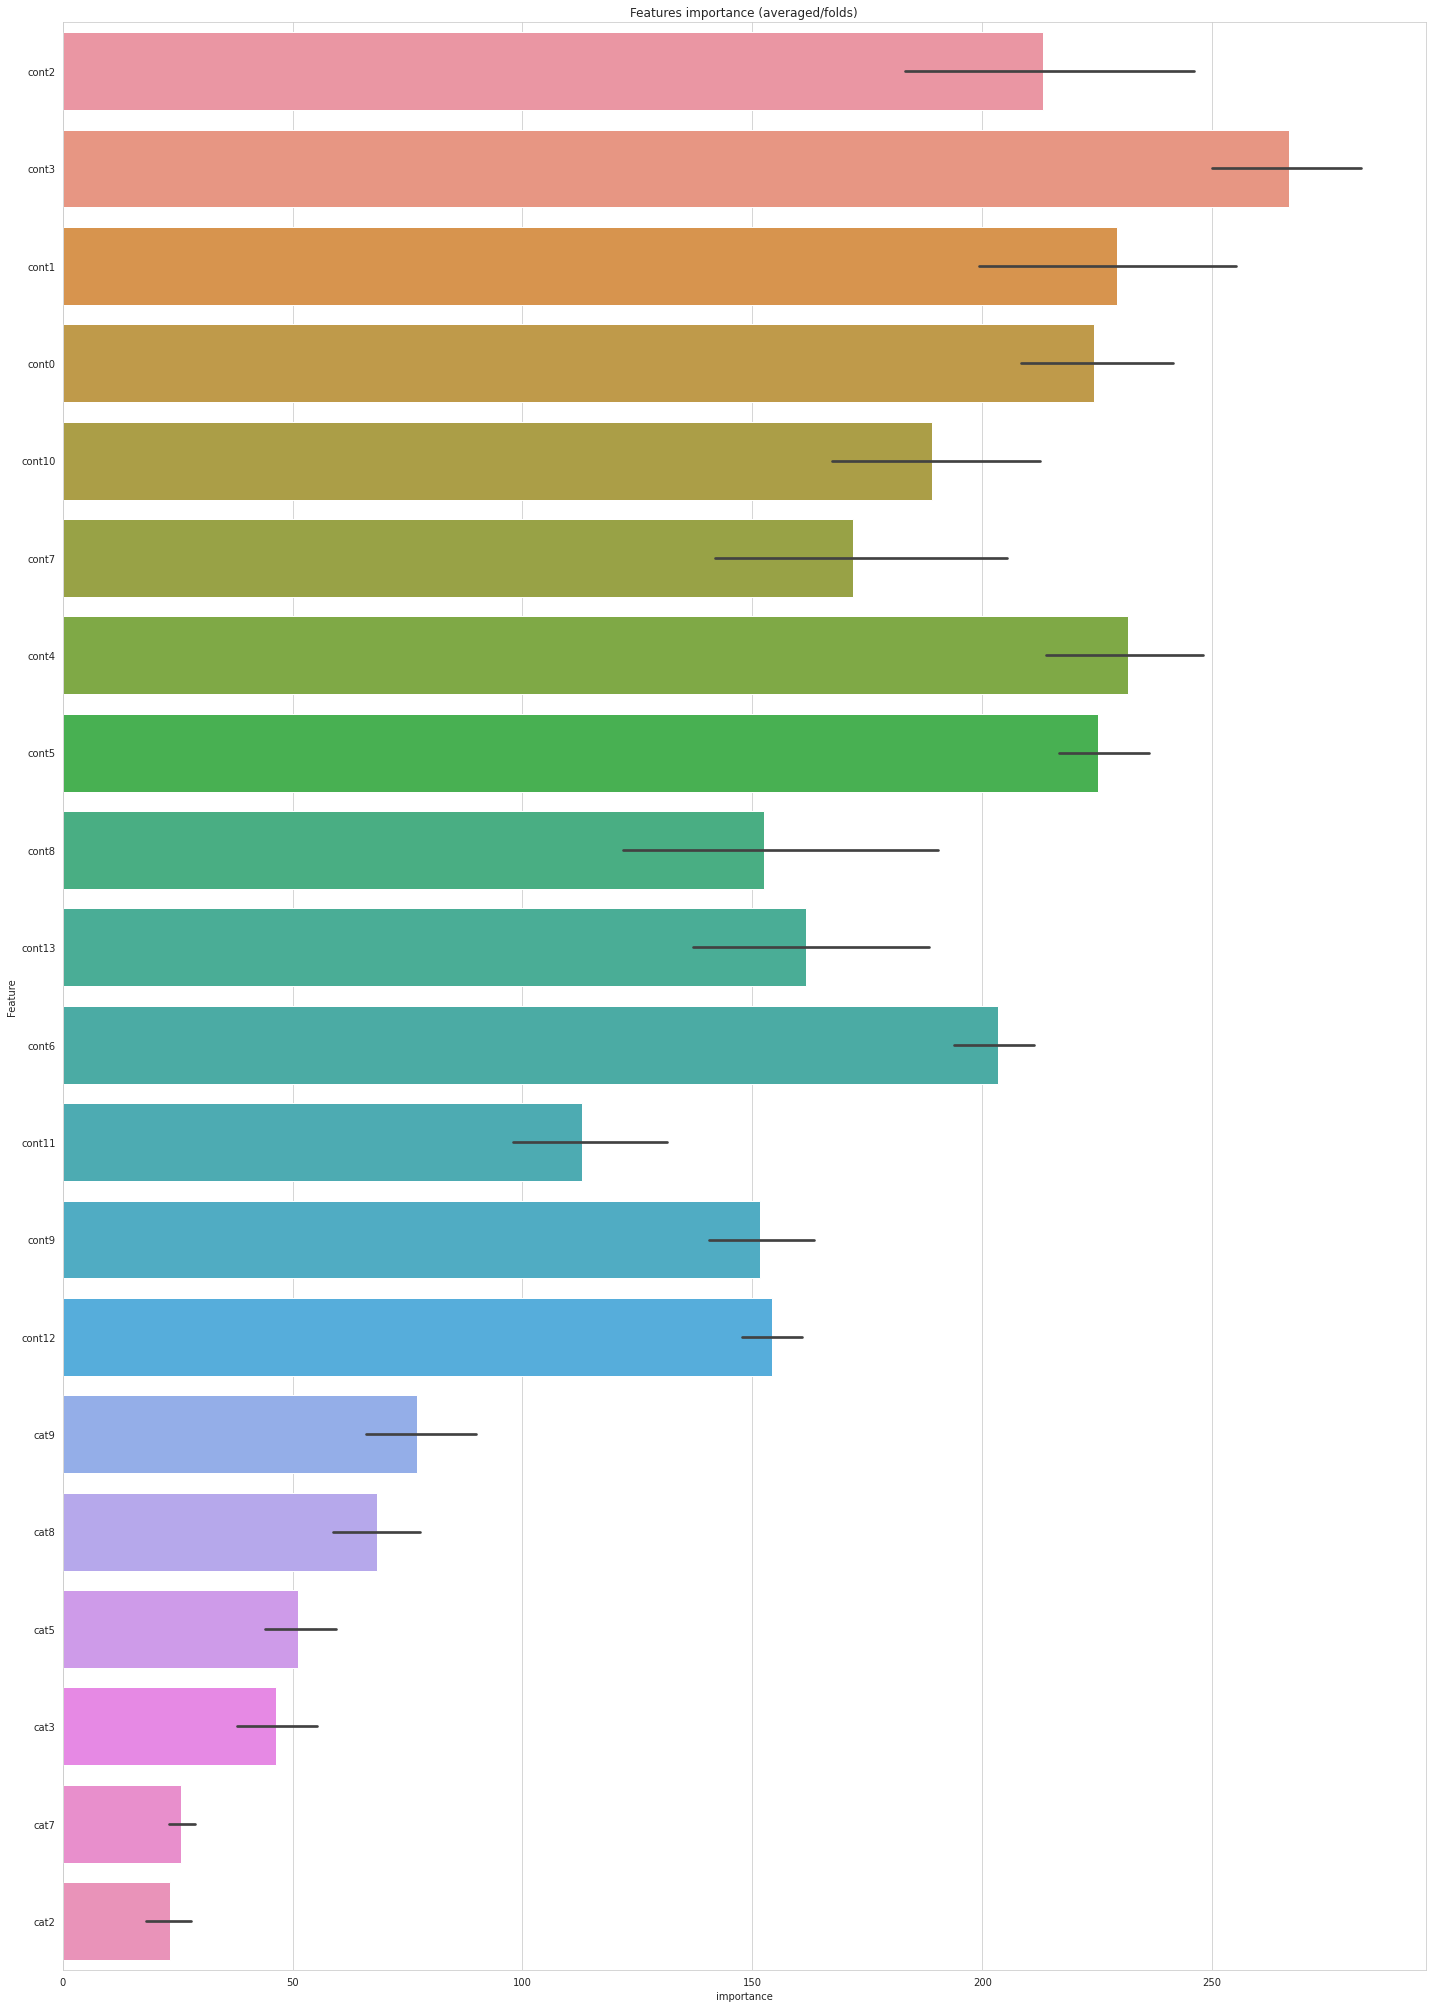

In [52]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:20].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(20,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('Feature_Importance.png')


In [53]:
# Take a look on XGBOOST
final_xgboost = XGBRegressor(objective='reg:squarederror',
                             n_estimators=140,
                             learning_rate=0.14,
                             max_depth = 5,
                             min_child_weight = 0.01,
                             #silent = 0.1,
                             subsample = 0.9,
                             colsample_bytree =0.2,
                             tree_method='gpu_hist',
                             predictor='gpu_predictor',
                             random_state=0)

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', final_xgboost)
                     ])

pipeline_xgb.fit(X_train, y_train)
preds = pipeline_xgb.predict(X_valid)
msqrte_xgb = mean_squared_error(y_valid, preds, squared=False)
print('RMSE:', msqrte_xgb)

RMSE: 0.7279515281413835


In [54]:
predictions = pd.DataFrame()
df_test = df_test.reset_index()
predictions["id"] = df_test["id"]
predictions["target"] = pred

predictions.to_csv('submission.csv', index=False, header=predictions.columns)
predictions.head()

,id,target
0,0,8.033275
1,5,8.362783
2,15,8.422532
3,16,8.503626
4,17,8.179934


#### Ref  : / https://www.kaggle.com/sgedela/30-days-of-ml-model-averaging-ensemble
